<a href="https://colab.research.google.com/github/tylee33/Paper_Research/blob/main/GLD_VIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

#Thomson Reuters Eikon 데이터 활용
data = pd.read_csv('https://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

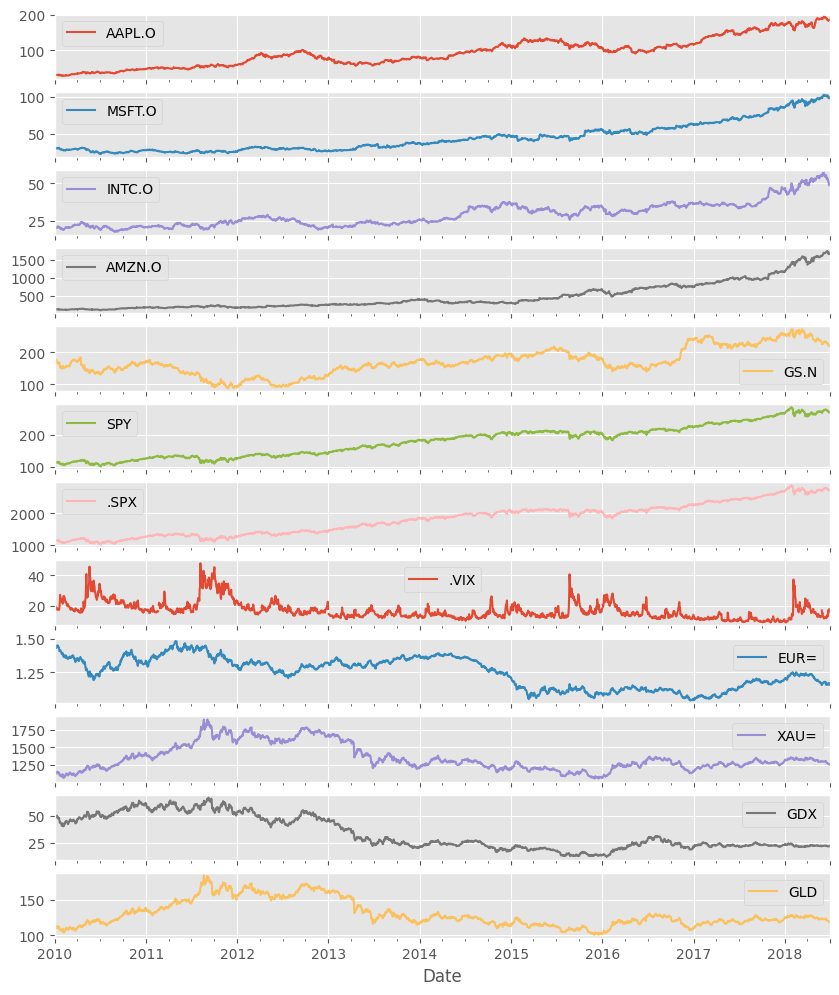

In [2]:
data.plot(figsize = (10,12) , subplots=True)

In [3]:
instruments = [
    'Apple Stock',
    'Microsoft Stock',
    'Intel Stock',
    'Amazone Stock',
    'Goldman Sachs Stock',
    'SPDR S&P 500 ETF Trust',
    'S&P 500 Index',
    'VIX Volatility Index',
    'EUR/USD Exchange Rate',
    'Gold Price',
    'VanEck Vectors Gold Miners ETF',
    'SPDR Gold Trust'
]

for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazone Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


In [4]:
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


## * 시간에 따른 변화 측정

### data.diff() 활용

### 절대적인 차이값은 시계일 데이터의 스케일에 좌우되기 때문에 퍼센트 변화를 계산하는 것이 나음.

<ipython-input-5-ae99f30f2c99>:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.pct_change().round(3).head() #두 인덱스 값 사이의 퍼센트 변화율을 계산
<ipython-input-5-ae99f30f2c99>:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data.pct_change().mean().plot(kind = 'bar', figsize=(10,6)) #결과 평균값을 바 차트로 시각화


<Axes: >

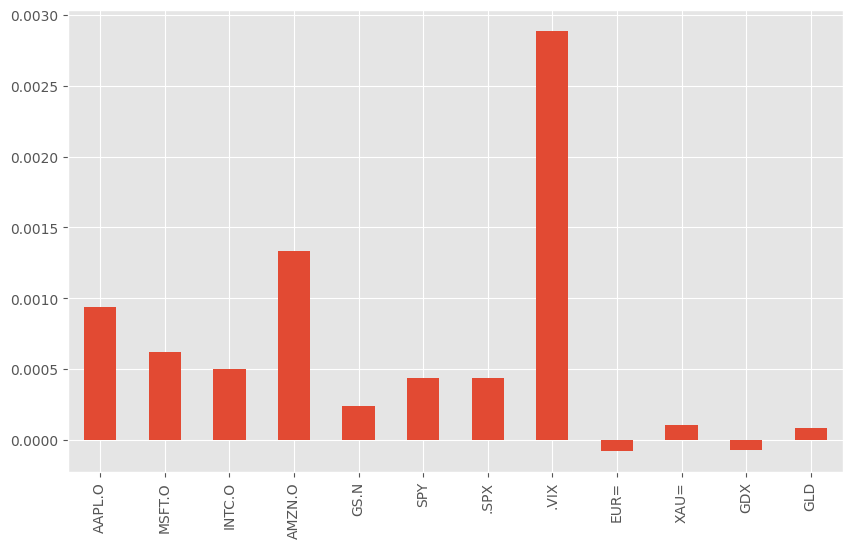

In [5]:
data.diff().head() #두 인덱스 값 사이의 차이 계산
data.diff().mean() #차잇값의 평균 계산
data.pct_change().round(3).head() #두 인덱스 값 사이의 퍼센트 변화율을 계산
data.pct_change().mean().plot(kind = 'bar', figsize=(10,6)) #결과 평균값을 바 차트로 시각화

## 퍼센트 수익률 대신 로그 수익률 사용 (로그 수익률은 덧셈이 가능)

<Axes: xlabel='Date'>

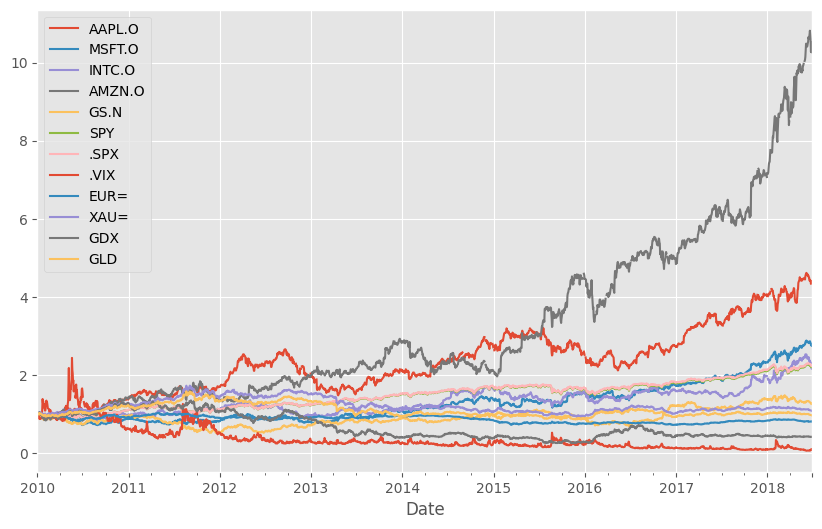

In [6]:
rets = np.log(data / data.shift(1)) #벡터화 방법으로 로그 수익률 계산
#rets.head().round(3) #결과 일부 확인
rets.cumsum().apply(np.exp).plot(figsize=(10,6)) #시간에 따른 누적 로그 수익률 표시, cumsum 후 np.exp 적용

## * 리샘플링

### 시계열 분석에서 중요한 연산으로 다운샘플링을 통해 틱 데이터를 1분 시계열로 바꾸거나 일간 데이터를 주간, 월간 데이터로 리샘플링 할 수 있다.

In [7]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

data = pd.read_csv('https://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

# data.head(10) #원본 데이터 확인
# data.resample('1w' , label = 'right').last().head() #일간 데이터 -> 주간 데이터로 리샘플링
# data.resample('1m' , label = 'right').last().head() #일간 데이터 -> 월간 데이터로 리샘플링

## * 이동통계

### + 'window'는 데이터 처리에 사용되는 윈도우 크기를 나타냄. 시계열 데이터에서 일정기간 관측치를 사용해 통계적 계산 또는 변환을 수행할 때 사용한다. rolling(window=20) 은 20일의 윈도우 크기를 가지는 이동평균을 계산.

<Axes: xlabel='Date'>

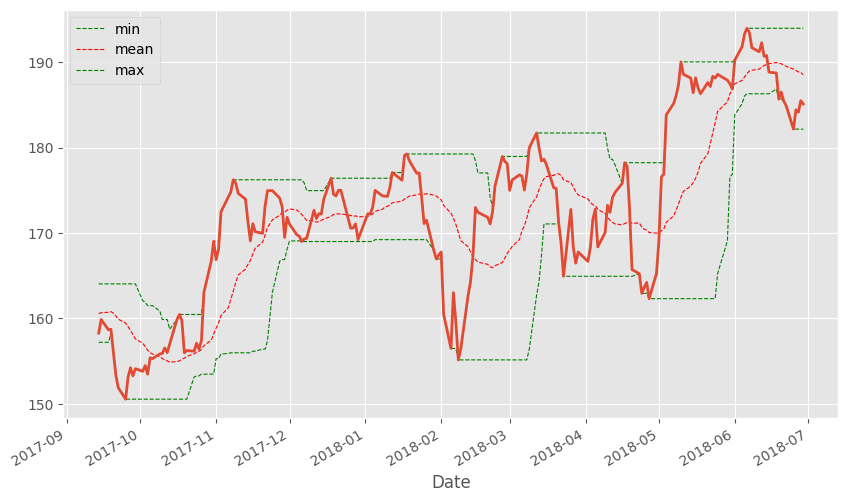

In [8]:
sym = 'AAPL.O' #애플주가

data = pd.DataFrame(data[sym]).dropna()
data.tail()

window = 20 #윈도우(사용 데이터 개수) 정의
data['min'] = data[sym].rolling(window=window).min() #이동 최솟값 계산
data['mean'] = data[sym].rolling(window=window).mean() #이동평균 계산
data['std'] = data[sym].rolling(window=window).std() #이동 표준편차 계산
data['median'] = data[sym].rolling(window=window).median() #이동 중앙값 계산
data['max'] = data[sym].rolling(window=window).max() #이동 최댓값 계산
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean() #반감기가 0.5인 지수가중 이동평균 계산

data.dropna().head()

ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10,6) , style=['g--' , 'r--' , 'g--'], lw=0.8) #세 가지 이동통계의 마지막 200개 값을 플롯
data[sym].iloc[-200:].plot(ax=ax, lw=2.0) #원본 시계열 데이터 플롯

## ex) 이동평균 매매법 예제 : 이동평균선이 장기 이동평균선보다 올라갈 때 매수를 하고 반대의 경우 매도를 시행

### 이동평균선을 써서 매매 전략 시점을 결정 (1 값으로 매수 포지션, -1 값으로 매도 포지션 차팅)

### 포지션 변화는 두 개의 이동평균선이 교차하는 지점으로 정한다

<Axes: xlabel='Date'>

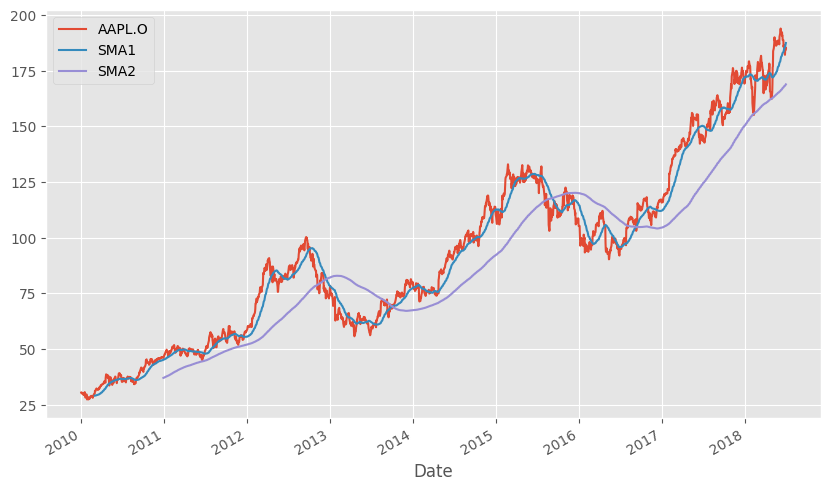

In [9]:
data['SMA1'] = data[sym].rolling(window=42).mean() #42일 윈도우 크기를 가지는 이동평균을 계산
data['SMA2'] = data[sym].rolling(window=252).mean() #252일 윈도우 크기를 가지는 이동평균을 계산
data[[sym, 'SMA1' , 'SMA2']].tail()

data[[sym, 'SMA1' , 'SMA2']].plot(figsize=(10,6))

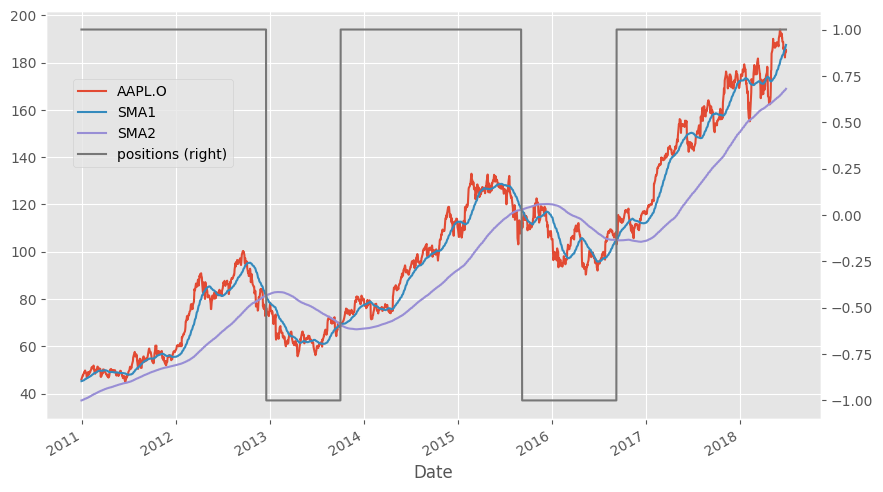

In [10]:
data.dropna(inplace = True) #null 없애기

#data['SMA1'] > data['SMA2'] 단기 이동평균선이 더 큼
#매수 : 1 , 매도 : -1
data['positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
ax = data[[sym, 'SMA1', 'SMA2' , 'positions']].plot(figsize = (10,6), secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## * 상관관계 분석

### S&P 500 지수와 VIX 변동성 지수 경우의 예제.
### S&P 500이 오르면 VIX 변동성 지수는 떨어지는 상관관계가 있음 (강한 음의 상관관계, 금융 위기 시 주가지수가 하락하면 거래량이 늘어나고 변동성이 함께 늘어남)

## S$P 500지수와 VIX 변동성지수 차트

<Axes: xlabel='Date'>

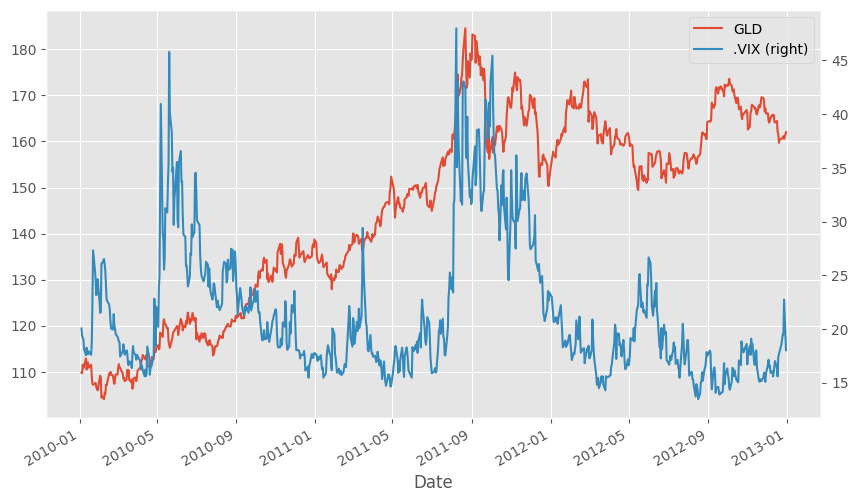

In [12]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pylab import plt
plt.style.use('ggplot')
%matplotlib inline

raw = pd.read_csv('https://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)

data = raw[['GLD' , '.VIX']].dropna()

#2012년 12월 31일까지 선택
data.loc[:'2012-12-31'].plot(secondary_y='.VIX' , figsize=(10, 6))

### 다음으로 통계분석은 절대적인 값이나 변화량보다는 수익률을 기반으로 하기 때문에 로그 수익률 계산을 진행한다.

### S&P 500과 VIX 변동성 지수에서 변동성 클러스터가 발생함을 시각화를 통해 알 수 있다.
### (변동성 클러스터 : 시계열 데이터에서 변동성이 비슷한 구간이 군집을 형성하는 현상)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

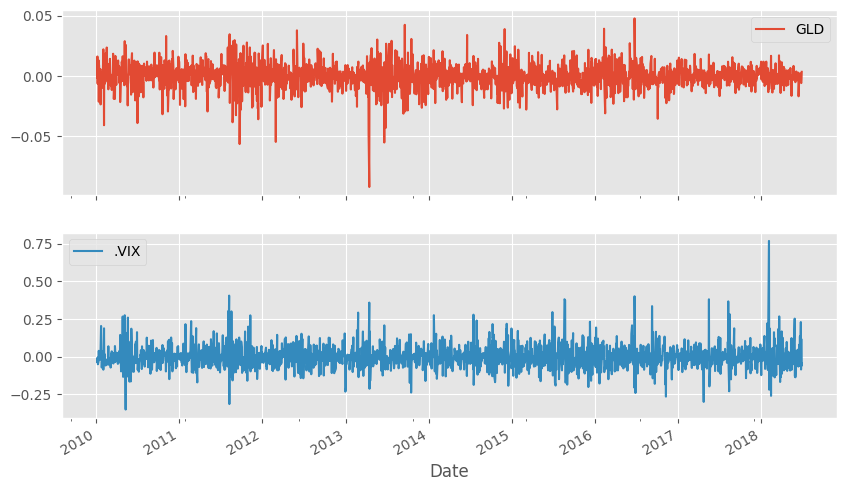

In [13]:
rets = np.log(data / data.shift(1))
rets.head()
rets.dropna(inplace = True)
rets.plot(subplots = True, figsize = (10, 6))

## pandas에 scatter_matrix() 함수를 사용해 시각화 진행, 두 시계열의 로그 수익률을 그리면서 대각선에는 히스토그램, 커널 밀도 추정치를 그린다.

array([[<Axes: xlabel='GLD', ylabel='GLD'>,
        <Axes: xlabel='.VIX', ylabel='GLD'>],
       [<Axes: xlabel='GLD', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

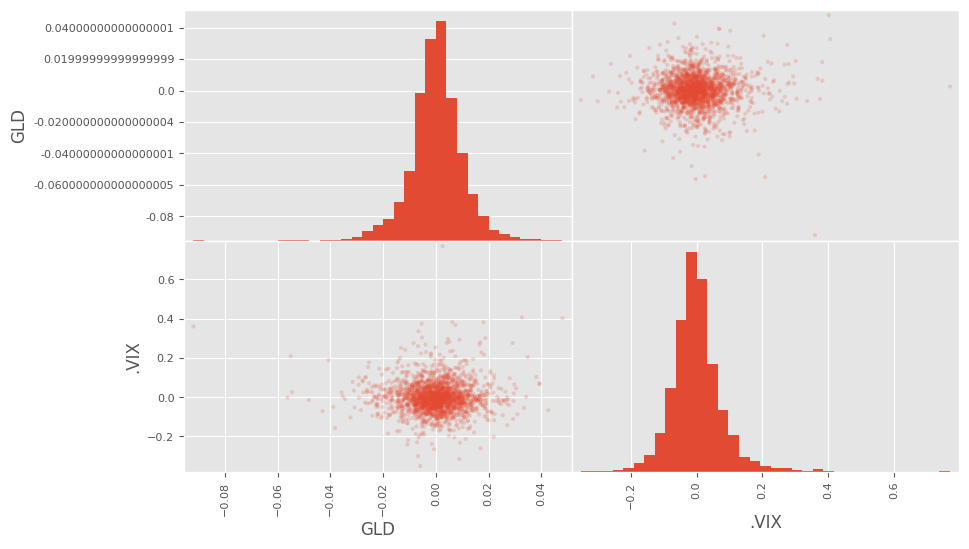

In [14]:
pd.plotting.scatter_matrix(rets,
                          alpha=0.2,
                          diagonal='hist',
                          hist_kwds={'bins' : 35},
                          figsize = (10,6))

## 이후 최소자승(OLS) 회귀법 진행.

### ( OLS : 관찰된 데이터와 모델 예측 값 사이의 잔차 제곱의 합을 최소화하여 모델 파라미터를 추정,  주어진 데이터에 대해 오차 항의 제곱을 최소화하는 회귀 계수를 계산하는 방법.

### OLS는 통계적 검정과 신뢰구간을 계산하는데 사용되며 종속변수-독립변수 사이의 선형 관계를 가정할 때 유용하다.)

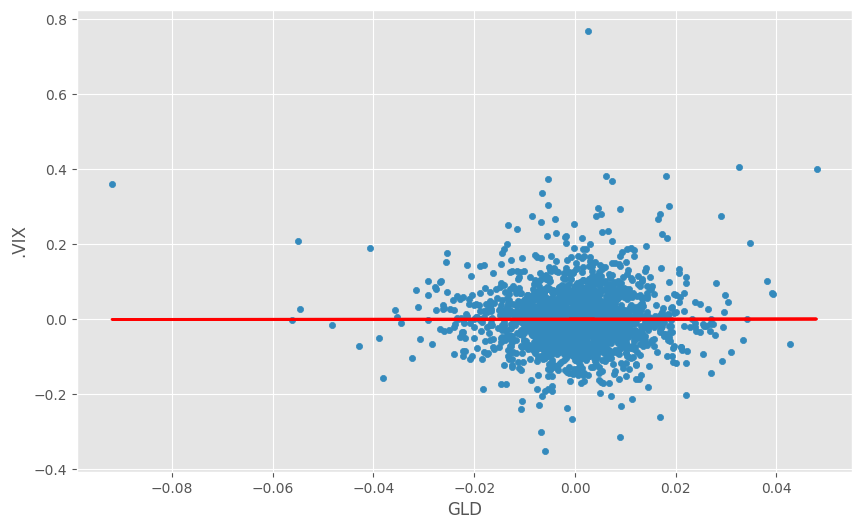

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 다항식 회귀를 수행하여 최적의 다항식 계수를 계산 (OLS 선형회귀)
reg = np.polyfit(rets['GLD'], rets['.VIX'], deg=1)

# 산점도 플롯 생성 (로그 수익률)
ax = rets.plot(kind='scatter', x='GLD', y='.VIX', figsize=(10,6))

# 다항식 회귀 결과를 그래프에 추가
ax.plot(rets['GLD'], np.polyval(reg, rets['GLD']), 'r', lw=2)

# 그래프 출력
plt.show()

### 마지막으로 상관관계를 직접 측정.
### 1. 전체 데이터에 대한 상관관계 측정
### 2. 고정된 시간 동안의 윈도우를 가지며 변하는 이동 상관관계

In [16]:
rets.corr() #상관관계 수치 확인

,GLD,.VIX
GLD,1.000000,0.000994
.VIX,0.000994,1.000000


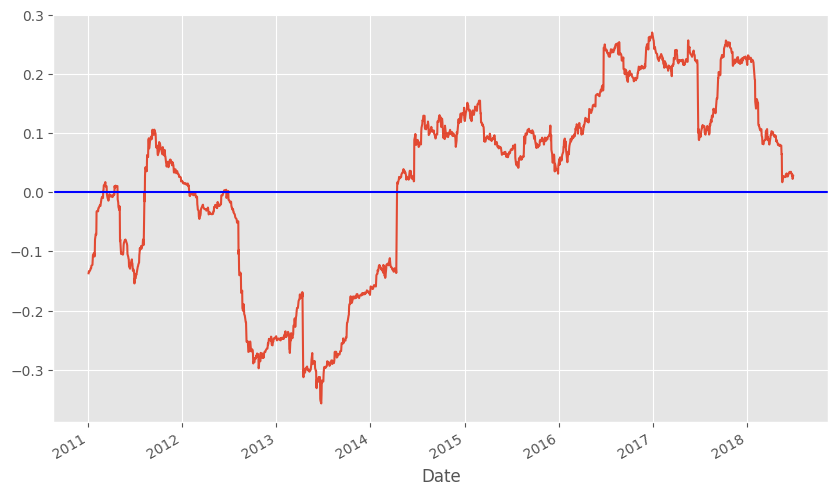

In [18]:
#시간에 따라 변하는 이동 상관관계 플롯
ax = rets['GLD'].rolling(window=252).corr(rets['.VIX']).plot(figsize=(10,6))
#수평선으로 전체 상관관계를 표기
ax.axhline(rets.corr().iloc[0,1], c='b')